# Ejemplo de modelo de media móvil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:

# Fijamos la semilla para reproducibilidad
np.random.seed(42)

# Generación de una serie de tiempo con un modelo MA(5)
n = 100  # Número de observaciones
ma_order = 5

# Coeficientes MA originales
true_coefficients = np.array([0.5, -0.4, 0.3, -0.2, 0.1])

# Generamos un ruido blanco
noise = np.random.normal(0, 1, n)

# Inicializamos la serie de tiempo
time_series = np.zeros(n)

# Generamos la serie de tiempo usando el modelo MA
for t in range(ma_order, n):
    time_series[t] = (true_coefficients @ noise[t-ma_order:t][::-1])  # Media móvil

# Pasamos a un DataFrame
dates = pd.date_range(start='2020-01-01', periods=n, freq='M')
series_df = pd.DataFrame(time_series, index=dates, columns=['Value'])


C:\Users\alonso.sandoval\AppData\Local\Temp\ipykernel_24412\3823220871.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=n, freq='M')


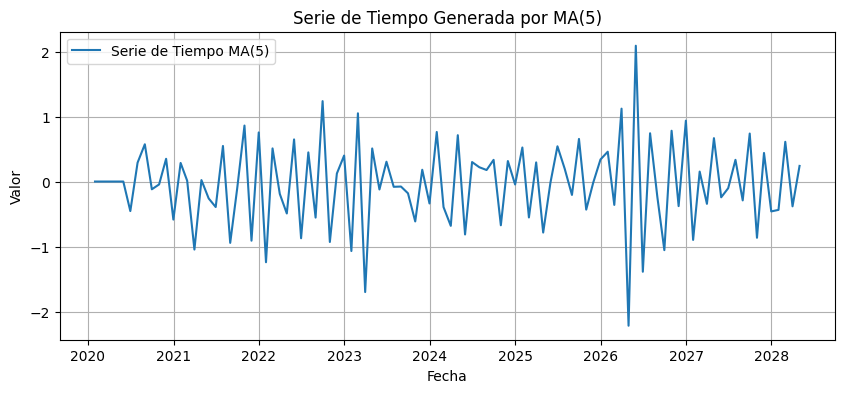

In [3]:

# Graficar la serie de tiempo
plt.figure(figsize=(10, 4))
plt.plot(series_df, label='Serie de Tiempo MA(5)')
plt.title('Serie de Tiempo Generada por MA(5)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()


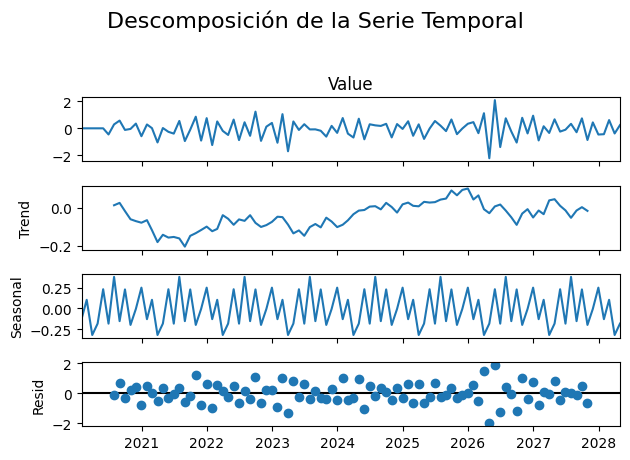

In [4]:

# Descomposición de la serie temporal
result = seasonal_decompose(series_df['Value'], model='additive', period=12)
fig = result.plot()
plt.suptitle('Descomposición de la Serie Temporal', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


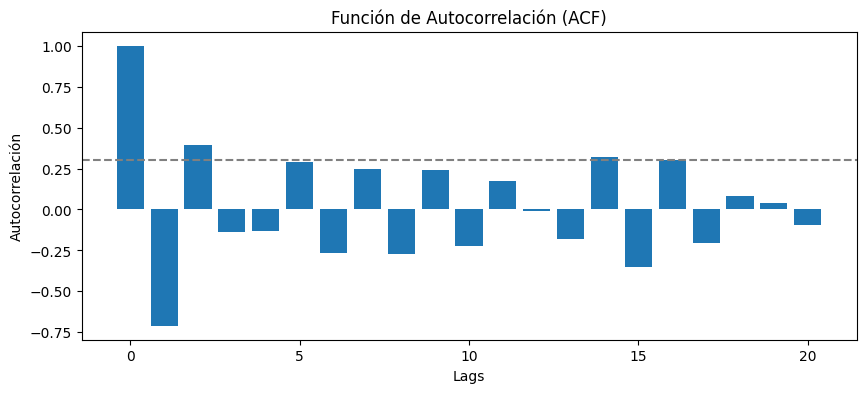

In [6]:

# Graficar la ACF
lag_acf = acf(series_df['Value'], nlags=20)
plt.figure(figsize=(10, 4))
plt.bar(range(len(lag_acf)), lag_acf)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.axhline(y=0.3, linestyle='--', color='gray')
plt.show()


In [7]:

# Ajustar un modelo MA al conjunto de datos
model = ARIMA(series_df['Value'], order=(0, 0, ma_order)).fit()

# Mostrar coeficientes
print("Coeficientes originales:", true_coefficients)
print("Coeficientes ajustados del modelo MA:")
print(model.params[1:])  # Excluyendo la constante


Coeficientes originales: [ 0.5 -0.4  0.3 -0.2  0.1]
Coeficientes ajustados del modelo MA:
ma.L1    -0.831132
ma.L2     0.618625
ma.L3    -0.539584
ma.L4     0.307458
ma.L5    -0.006890
sigma2    0.192314
dtype: float64
